Importing necessary libraries and packages

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import warnings


In [100]:
warnings.filterwarnings("ignore")

Loading the dataset

In [101]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Information about the dataset

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Describing the dataset

In [103]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking for missing values

In [104]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Checking the datatype of each column

In [105]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Checking for duplicate values

In [106]:
duplicate = df.loc[df.duplicated(keep = False)]
duplicate

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


Removing duplicate values

In [107]:
df=df.drop_duplicates()

In [108]:
df.duplicated().sum()

0

Data Visualisation

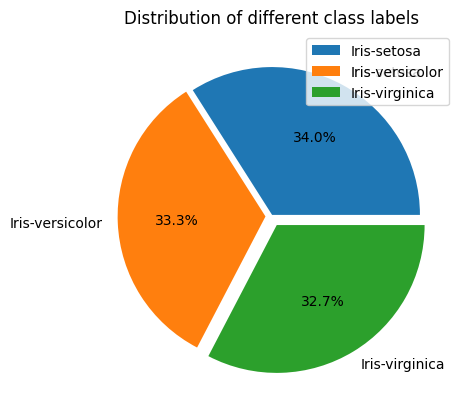

In [109]:
y=df["species"].value_counts()
lbl=df["species"].unique()
explode =[0.01, 0.04, 0.07]
plt.title('Distribution of different class labels')
plt.pie(y,labels=lbl,explode=explode,autopct='%1.1f%%')
plt.legend()
plt.show()

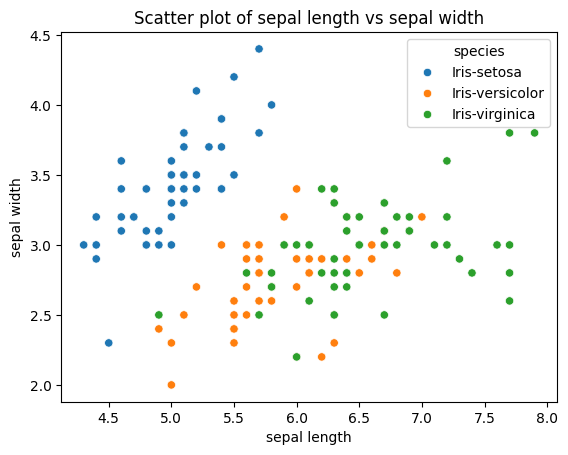

In [110]:
sns.scatterplot(data=df, x="sepal_length", y="sepal_width",hue="species")
plt.title('Scatter plot of sepal length vs sepal width')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

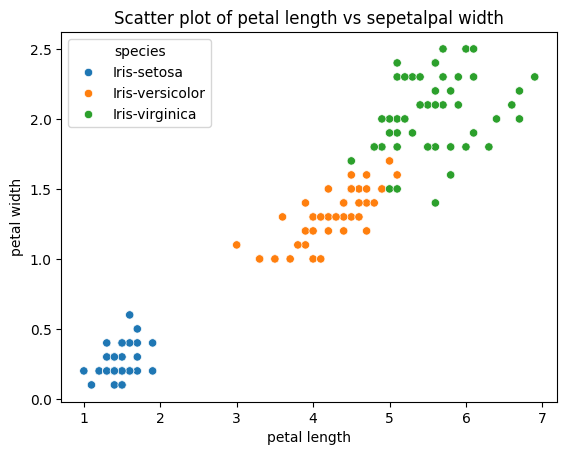

In [111]:
sns.scatterplot(data=df, x="petal_length", y="petal_width",hue="species")
plt.title('Scatter plot of petal length vs sepetalpal width')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

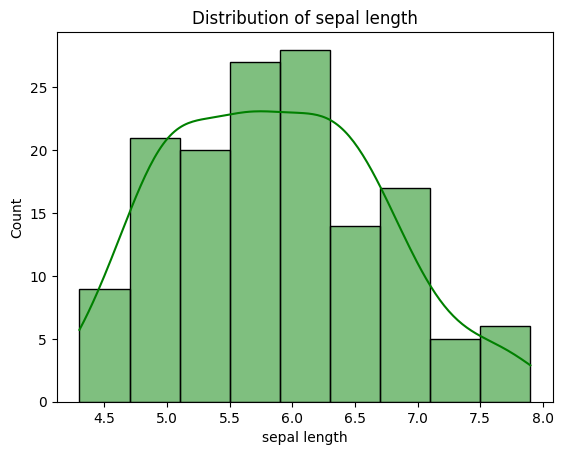

In [112]:
sns.histplot(data=df, x="sepal_length",color="green",kde=True)
plt.title('Distribution of sepal length')
plt.xlabel('sepal length')
plt.ylabel('Count')
plt.show()

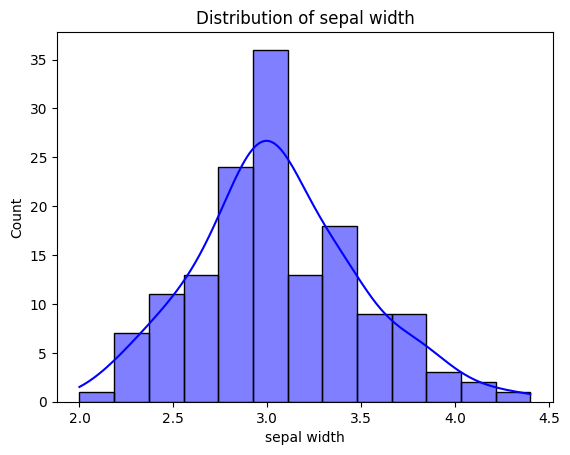

In [113]:
sns.histplot(data=df, x="sepal_width",color="blue",kde=True)
plt.title('Distribution of sepal width')
plt.xlabel('sepal width')
plt.ylabel('Count')
plt.show()

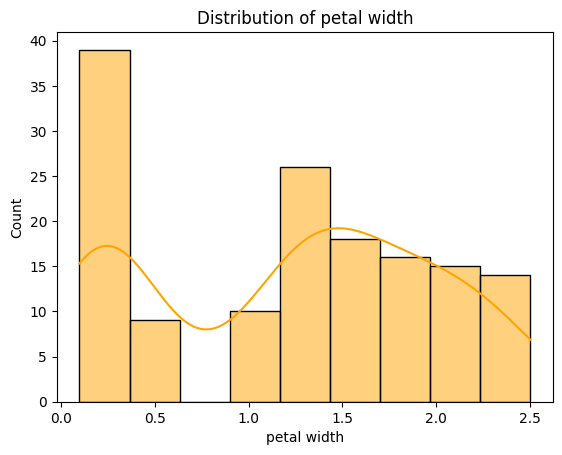

In [114]:
sns.histplot(data=df, x="petal_width",color="orange",kde=True)
plt.title('Distribution of petal width')
plt.xlabel('petal width')
plt.ylabel('Count')
plt.show()

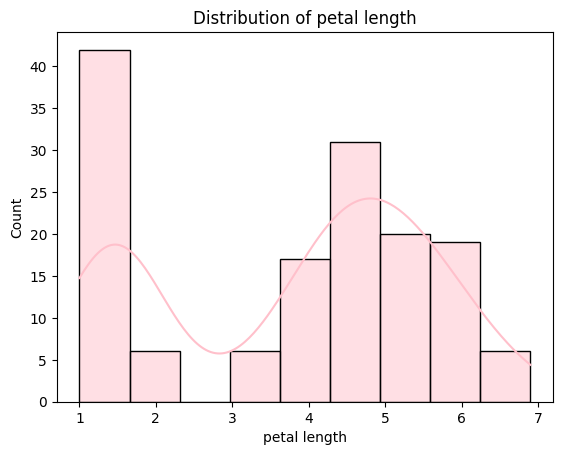

In [115]:
sns.histplot(data=df, x="petal_length",color="pink",kde=True)
plt.title('Distribution of petal length')
plt.xlabel('petal length')
plt.ylabel('Count')
plt.show()

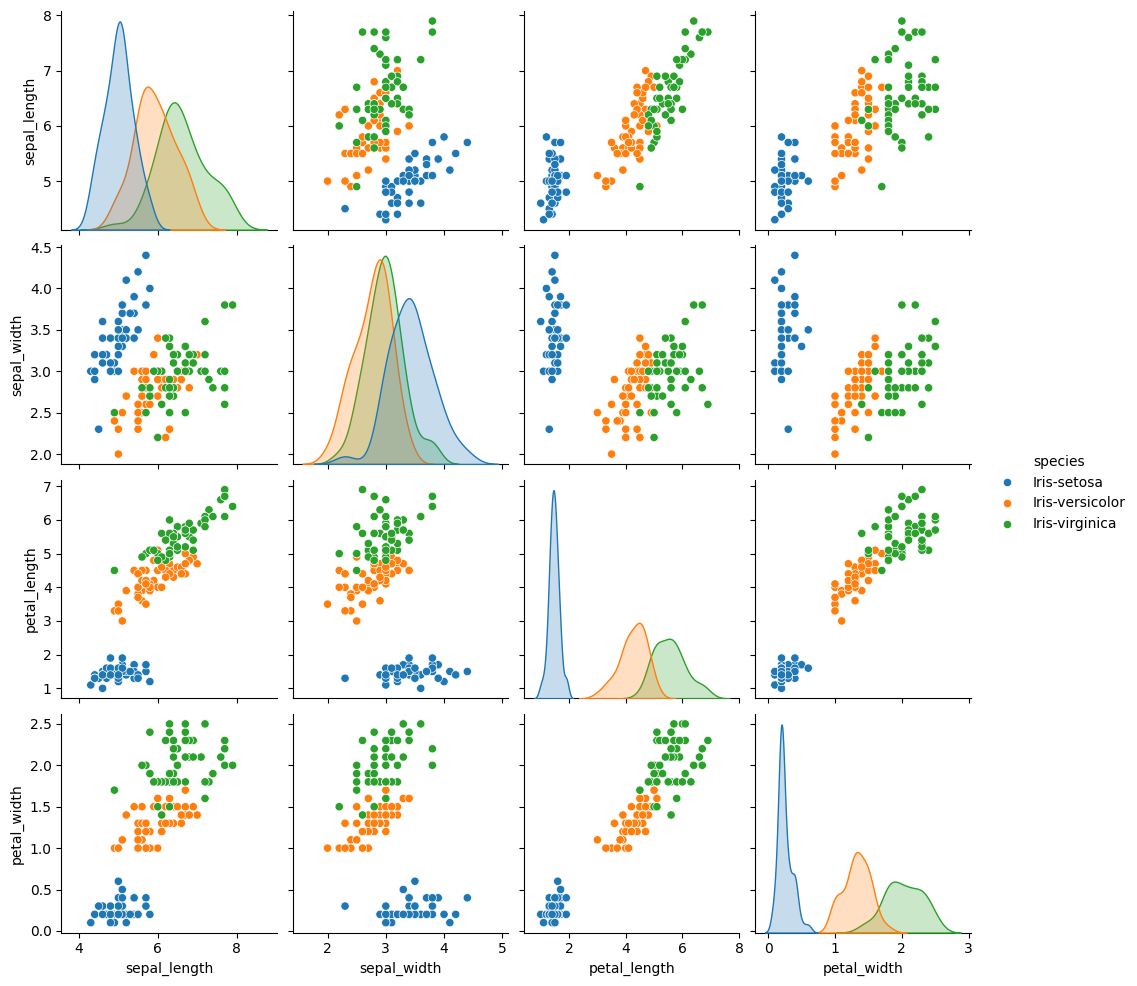

In [116]:
sns.pairplot(df,hue="species")
plt.show()

Converting categorical columns into numerical columns

In [117]:
le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])

In [118]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


Plotting the correlation heatmap

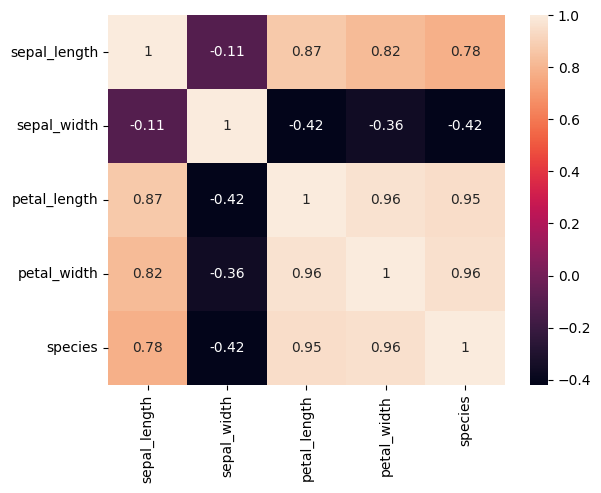

In [119]:
sns.heatmap(df.corr(),annot=True)
plt.show()

Splitting input and output

In [120]:
X=df.drop(["species"],axis=1).values
y=df.iloc[:,0-1]

Scaling the input using MinMax scaler

In [121]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)


Splitting the dataset into training and testing dataset

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=8)

Building different predictive classification models

In [123]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xb=XGBClassifier(random_state=1)
models=[knn,svc,nb,dt,rf,ab,gb,xb]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(model)
  print(classification_report(y_test,y_pred))
  print('*'*55)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

*******************************************************
SVC()
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        13
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

*******************************************************
GaussianNB()
              precision    recall  f1-score   support

           0       1.00      

Since KNN, SVC and GradientBoostingClassifier have the highest accuracy of 98 %, using one of them for prediction purpose

In [124]:
svc.fit(X_train,y_train)

SVC()

Plotting confusion matrix

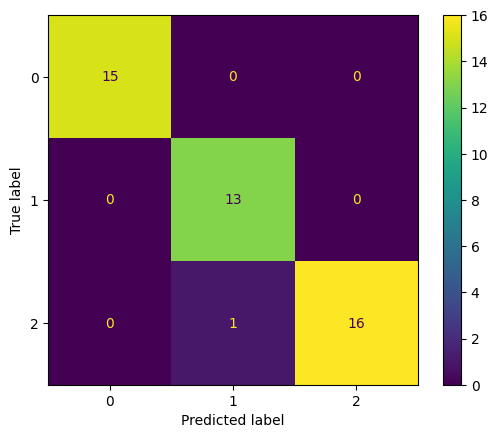

In [125]:
y_pred=svc.predict(X_test)
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

Predicting new values

In [126]:
y_pred_new=svc.predict(scaler.transform([[6.7,3.0,5.2,2.3]]))
print("Iris-setosa" if y_pred_new.item() ==0 else "Iris-versicolor"if y_pred_new.item() ==1 else "Iris-virginica"  )

Iris-virginica
